<a href="https://colab.research.google.com/github/gkrry2723/ML_pytorch_study/blob/master/1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9C_%EB%8B%A4%EC%8B%9C%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **머신러닝 과제 다시 해보기 with pytorch**

# Linear Regression 특집!

**과제 1. linear regression, cost function**


- 임의의 리니어 함수 하나 정하여 검은색 포인트 찍기

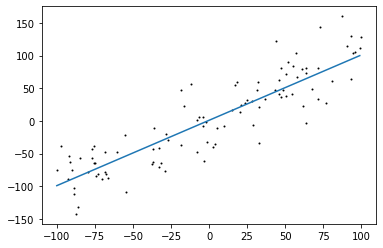

In [ ]:
import matplotlib.pyplot as plt
import random

x = range(-100,100)
y = [v+1 for v in x]
plt.plot(x,y)

for i in range(0,100):
  xp = random.uniform(-100,100)
  yp = xp+1+random.gauss(0,30)
  plt.scatter(xp,yp,c="black",s=1)

- 위의 포인트들을 이용하여 h 함수 구하기

tensor([0.3569, 0.9762], requires_grad=True)


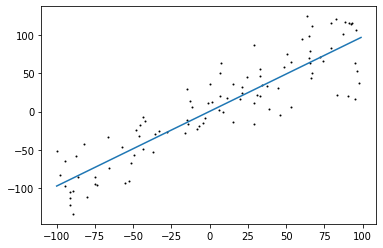

In [ ]:
import torch
from torch import nn

#데이터 생성
dataX = []
dataY = []
for i in range(0,100):
  xp = random.uniform(-100,100)
  yp = xp+1+random.gauss(0,30)
  dataX.append(xp)
  dataY.append(yp)
  plt.scatter(dataX[i],dataY[i],c="black",s=1)

#진짜 답
want = [1,1]
#파라미터
w = torch.randn(2,requires_grad=True)
#데이터 준비
t = torch.Tensor(dataX)
t.unsqueeze_(1)
f = torch.ones(len(dataX),1)
X = torch.cat([torch.ones(len(dataX),1),t],1)
y = torch.Tensor(dataY)

#학습률
gamma = 0.00001

#학습 시작!
losses = []

for epoch in range(10000):
  #전회의 grad를 초기화
  w.grad = None

  #선형모델로 y값을 예측
  y_pred = torch.mv(X,w)
  #print(y_pred.size())

  #MSE loss와 w에 의한 미분을 계산
  #J = 1/2m 시그마(h(x)-y)^2
  loss = torch.mean((y-y_pred)**2)
  loss.backward()

  #경사를 갱신. 이때 w를 그대로 대입 ㄴㄴ. data만 갱신
  #세타 = 세타 - a*기울기
  w.data = w.data - gamma*w.grad.data

  losses.append(loss.item())
print(w)
#plt.plot()

x = range(-100,100)
y = [v*w[1] + w[0] for v in x]
plt.plot(x,y)
#plt.plot(losses)

- 모듈(nn, optim)을 쓰면

[Parameter containing:
tensor([[ 0.6022, -3.9707]], requires_grad=True)]


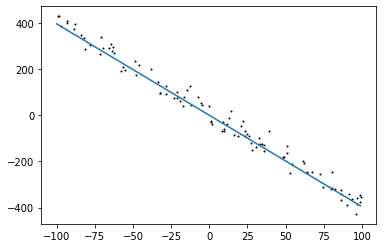

In [ ]:
import torch
from torch import nn, optim
import numpy as np

#데이터 생성
dataX = []
dataY = []
for i in range(0,100):
  xp = random.uniform(-100,100)
  yp = -4*xp+15+random.gauss(0,30)
  dataX.append(xp)
  dataY.append(yp)
  plt.scatter(dataX[i],dataY[i],c="black",s=1)

#1. 데이터 준비
t = torch.Tensor(dataX)
t.unsqueeze_(1)
f = torch.ones(len(dataX),1)
X = torch.cat([torch.ones(len(dataX),1),t],1)
y = torch.Tensor(dataY)


#2. net 준비
net = nn.Linear(2,1,bias=False)

#3. loss function 준비
loss_fn = nn.MSELoss()

#4. optimizer 준비
optimizer = optim.SGD(net.parameters(),lr = 0.000001)

#학습 시작!
losses = []

for epoch in range(1000):
  #1. 전회 grad 초기화
  optimizer.zero_grad()
  #2. y_pred 계산
  y_pred = net(X)
  #3. loss계산
  loss = loss_fn(y_pred.view_as(y),y)
  #4. backward
  loss.backward()
  #5. optim
  optimizer.step()

  losses.append(loss.item())

#w, b = model.parameters()
#w[0][0].item(), b[0].item()
print(list(net.parameters()))

para = list(net.parameters())
a = para[0][0][0].item()
b = para[0][0][1].item()

x = range(-100,100)
y = [v*b + a for v in x]
plt.plot(x,y)
#plt.plot(losses)

**과제 2. linear regression, cost function**


- 점은 주어져 있고 나는 코딩만 하면된다...

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import random

with open('/content/gdrive/MyDrive/ML_assignment/data_test.csv', newline="") as myfile:
  reader = csv.reader(myfile,delimiter=",")
  test_data = []
  test_y = []
  for i in reader:
    T = [float(i[0]), float(i[1]), float(i[2])]
    Y = float(i[3])
    test_data.append(T)
    test_y.append(Y)
test_len = len(test_data)

with open('/content/gdrive/MyDrive/ML_assignment/data_train.csv', newline="") as myfile:
  reader = csv.reader(myfile,delimiter=",")
  train_data = []
  train_y = []
  for i in reader:
    T = [float(i[0]), float(i[1]), float(i[2])]
    train_y.append(float(i[3]))
    train_data.append(T)
train_len = len(train_data)


In [ ]:
import torch 
from torch import nn,optim

X_test = torch.Tensor(test_data)
X_train = torch.Tensor(train_data)

Y_test = torch.Tensor(test_y)
Y_train = torch.Tensor(train_y)

net = nn.Linear(3,1,bias = True)

loss_fn = nn.MSELoss()

optimizer = optim.SGD(net.parameters(),lr = 0.000001)

Trlosses = []
Telosses = []
acc = []
#train
for epoch in range(1000):
  net.train()
  optimizer.zero_grad()
  y_pred = net(X_train)
  loss = loss_fn(y_pred.view_as(Y_train),Y_train)
  loss.backward()
  optimizer.step()
  Trlosses.append(loss)

  #test
  net.eval()
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred.view_as(Y_test),Y_test)
  Telosses.append(loss)

#plt.plot(Trlosses)
#plt.plot(Telosses)

# **과제 3. 로지스틱 회귀 -> 점 classify하기**



In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


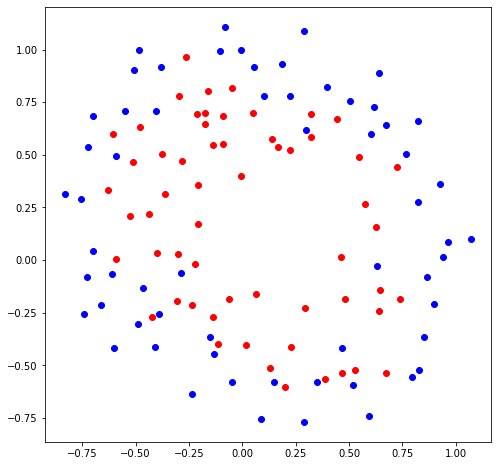

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/gdrive/My Drive/ML_assignment/data-nonlinear.txt", delimiter=',')

m=len(data)

x  = data[:, 0]
y  = data[:, 1]
label   = data[:, 2]

pointX0 = x[label == 0]
pointY0 = y[label == 0]

pointX1 = x[label == 1]
pointY1 = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
#plt.tight_layout()
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [ ]:
import torch
from torch import nn,optim

x  = data[:, 0]
y  = data[:, 1]
x2 = [i**2 for i in x]
y2 = [i**2 for i in y]
xy = [x[i]*y[i] for i in range(len(x))]
label   = data[:, 2]

f = torch.ones(len(x))
a = torch.Tensor(x)
b = torch.Tensor(y)
c = torch.Tensor(x2)
d = torch.Tensor(y2)
e = torch.Tensor(xy)
Y = torch.Tensor(label)

a.unsqueeze_(1)
b.unsqueeze_(1)
c.unsqueeze_(1)
d.unsqueeze_(1)
e.unsqueeze_(1)
f.unsqueeze_(1)
Y.unsqueeze_(1)

X = torch.cat([f,a,b,c,d,e],1)

print(X.size())
print(Y.size())


torch.Size([118, 6])
torch.Size([118, 1])


0.5338983050847458
0.8220338983050848
0.8389830508474576
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306


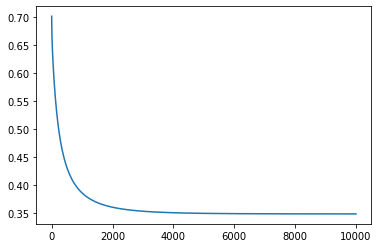

In [ ]:
net = nn.Linear(6,1,bias=False)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(),lr=0.5)
losses=[]

for epoc in range(10000):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred,Y)
  loss.backward()
  optimizer.step()
  losses.append(loss)

  if epoc%1000 == 0:
    h = net(X)
    prob = torch.sigmoid(h)
    y_pred = prob>0.5
    acc = (y_pred == Y).sum().item() / len(Y)
    print(acc)
plt.plot(losses)

[Parameter containing:
tensor([[  5.0945,   3.1890,   4.0966, -11.8510, -11.6373,  -7.3874]],
       requires_grad=True)]


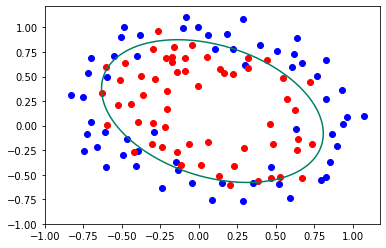

In [ ]:
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
xx = np.linspace(-1.0, 1.0, 100)
yy = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(xx,yy)
para = list(net.parameters())
print(para)
a = para[0][0][0].item()
b = para[0][0][1].item()
c = para[0][0][2].item()
d = para[0][0][3].item()
e = para[0][0][4].item()
f = para[0][0][5].item()

F = 1*a + b*X + c*Y + d*(X**2) + e*(Y**2) + f*X*Y
#F = 1*f + e*X + d*Y + c*(X**2) + b*(Y**2) + a*X*Y
plt.contour(X,Y,F,[0],cmap=plt.cm.summer)
plt.show()

# **과제 4. MNIST 숫자 분류**

0.15525876460767946
0.9398998330550918
0.988313856427379
0.9977740678909294
1.0
1.0
1.0
1.0
1.0
1.0


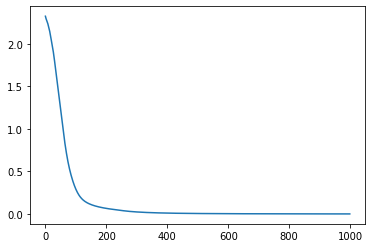

In [ ]:
import torch
from torch import nn,optim
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
Y = digits.target

X = torch.tensor(X,dtype = torch.float32)
Y = torch.tensor(Y,dtype = torch.int64)

# 다구현하고 나서 차이 봅시다
# X = torch.Tensor(X)
# Y = torch.Tensor(Y)

net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
    nn.ReLU()
)
#소프트맥스 크로스 엔트로피
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
losses = []

for epoc in range(1000):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred,Y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  
  if epoc %100 == 0:
    _, y_pred = torch.max(net(X),1)
    acc = (Y==y_pred).sum().item() / len(Y)
    print(acc)

plt.plot(losses)


